In [1]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt

In [3]:
true_w, true_b = 7.0, 4.0

def create_data(batch_size = 64):
    x = np.random.randn(batch_size, 1)
    y = np.random.randn(batch_size, 1) + true_w*x + true_b
    return x, y
#print(np.random.randn(64, 1))

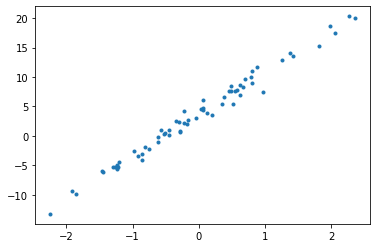

In [4]:
x, y = create_data()
plt.plot(x, y, '.')

In [12]:
iterations = 100
lr = 0.03

w_history = []
b_history = []

w = tf.Variable(10.0)
b = tf.Variable(1.0)
for i in range(0, iterations):
    x_batch, y_batch = create_data()
    x_batch = tf.convert_to_tensor(x_batch, dtype = tf.float32)
    y_batch = tf.convert_to_tensor(y_batch, dtype = tf.float32)
    
    with tf.GradientTape(persistent = True) as tape:
        y = w*x_batch + b
        loss = tf.reduce_mean(tf.square(y-y_batch))
        
    dw = tape.gradient(loss, w)
    db = tape.gradient(loss, b)

    del tape
    w.assign_sub(lr * dw)
    b.assign_sub(lr * db)

    w_history.append(w.numpy())
    b_history.append(b.numpy())
    
    if i % 10 == 0:
        print('Iteration {}, w = {}, b = {} :'.format(i, w.numpy(), b.numpy()))

Iteration 0, w = 9.856682777404785, b = 1.1514803171157837 :
Iteration 10, w = 8.402484893798828, b = 2.506951332092285 :
Iteration 20, w = 7.7539873123168945, b = 3.1903369426727295 :
Iteration 30, w = 7.394220352172852, b = 3.540951728820801 :
Iteration 40, w = 7.233916282653809, b = 3.7576043605804443 :
Iteration 50, w = 7.123191833496094, b = 3.875004529953003 :
Iteration 60, w = 7.064637660980225, b = 3.91249942779541 :
Iteration 70, w = 7.010655879974365, b = 3.975299835205078 :
Iteration 80, w = 7.019952297210693, b = 3.9721553325653076 :
Iteration 90, w = 7.003676891326904, b = 4.0104193687438965 :


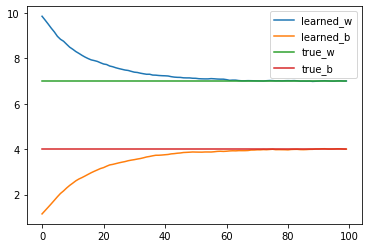

In [13]:
    plt.plot(range(iterations), w_history, label = 'learned_w')
    plt.plot(range(iterations), b_history, label = 'learned_b')
    plt.plot(range(iterations), [true_w] * iterations, label = 'true_w')
    plt.plot(range(iterations), [true_b] * iterations, label = 'true_b')
    plt.legend()
    plt.show()